In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
!pip install catboost
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.pipeline import make_pipeline

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.7 MB/s eta 0:00:00


In [6]:
import zipfile
import pandas as pd

# Specify the path to the zip file
zip_file_path = '/content/diabetes_prediction_dataset.csv.zip'

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
  # Extract the CSV file
  zip_ref.extractall('/content')

# Read the extracted CSV file into a pandas DataFrame
df = pd.read_csv('/content/diabetes_prediction_dataset.csv')

In [9]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [10]:
# Check for missing values
print("Checking for missing values:")
print(df.isnull().sum())

# Summary statistics for numerical variables
print("\nSummary statistics for numerical variables:")
print(df.describe())

Checking for missing values:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

Summary statistics for numerical variables:
                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.00

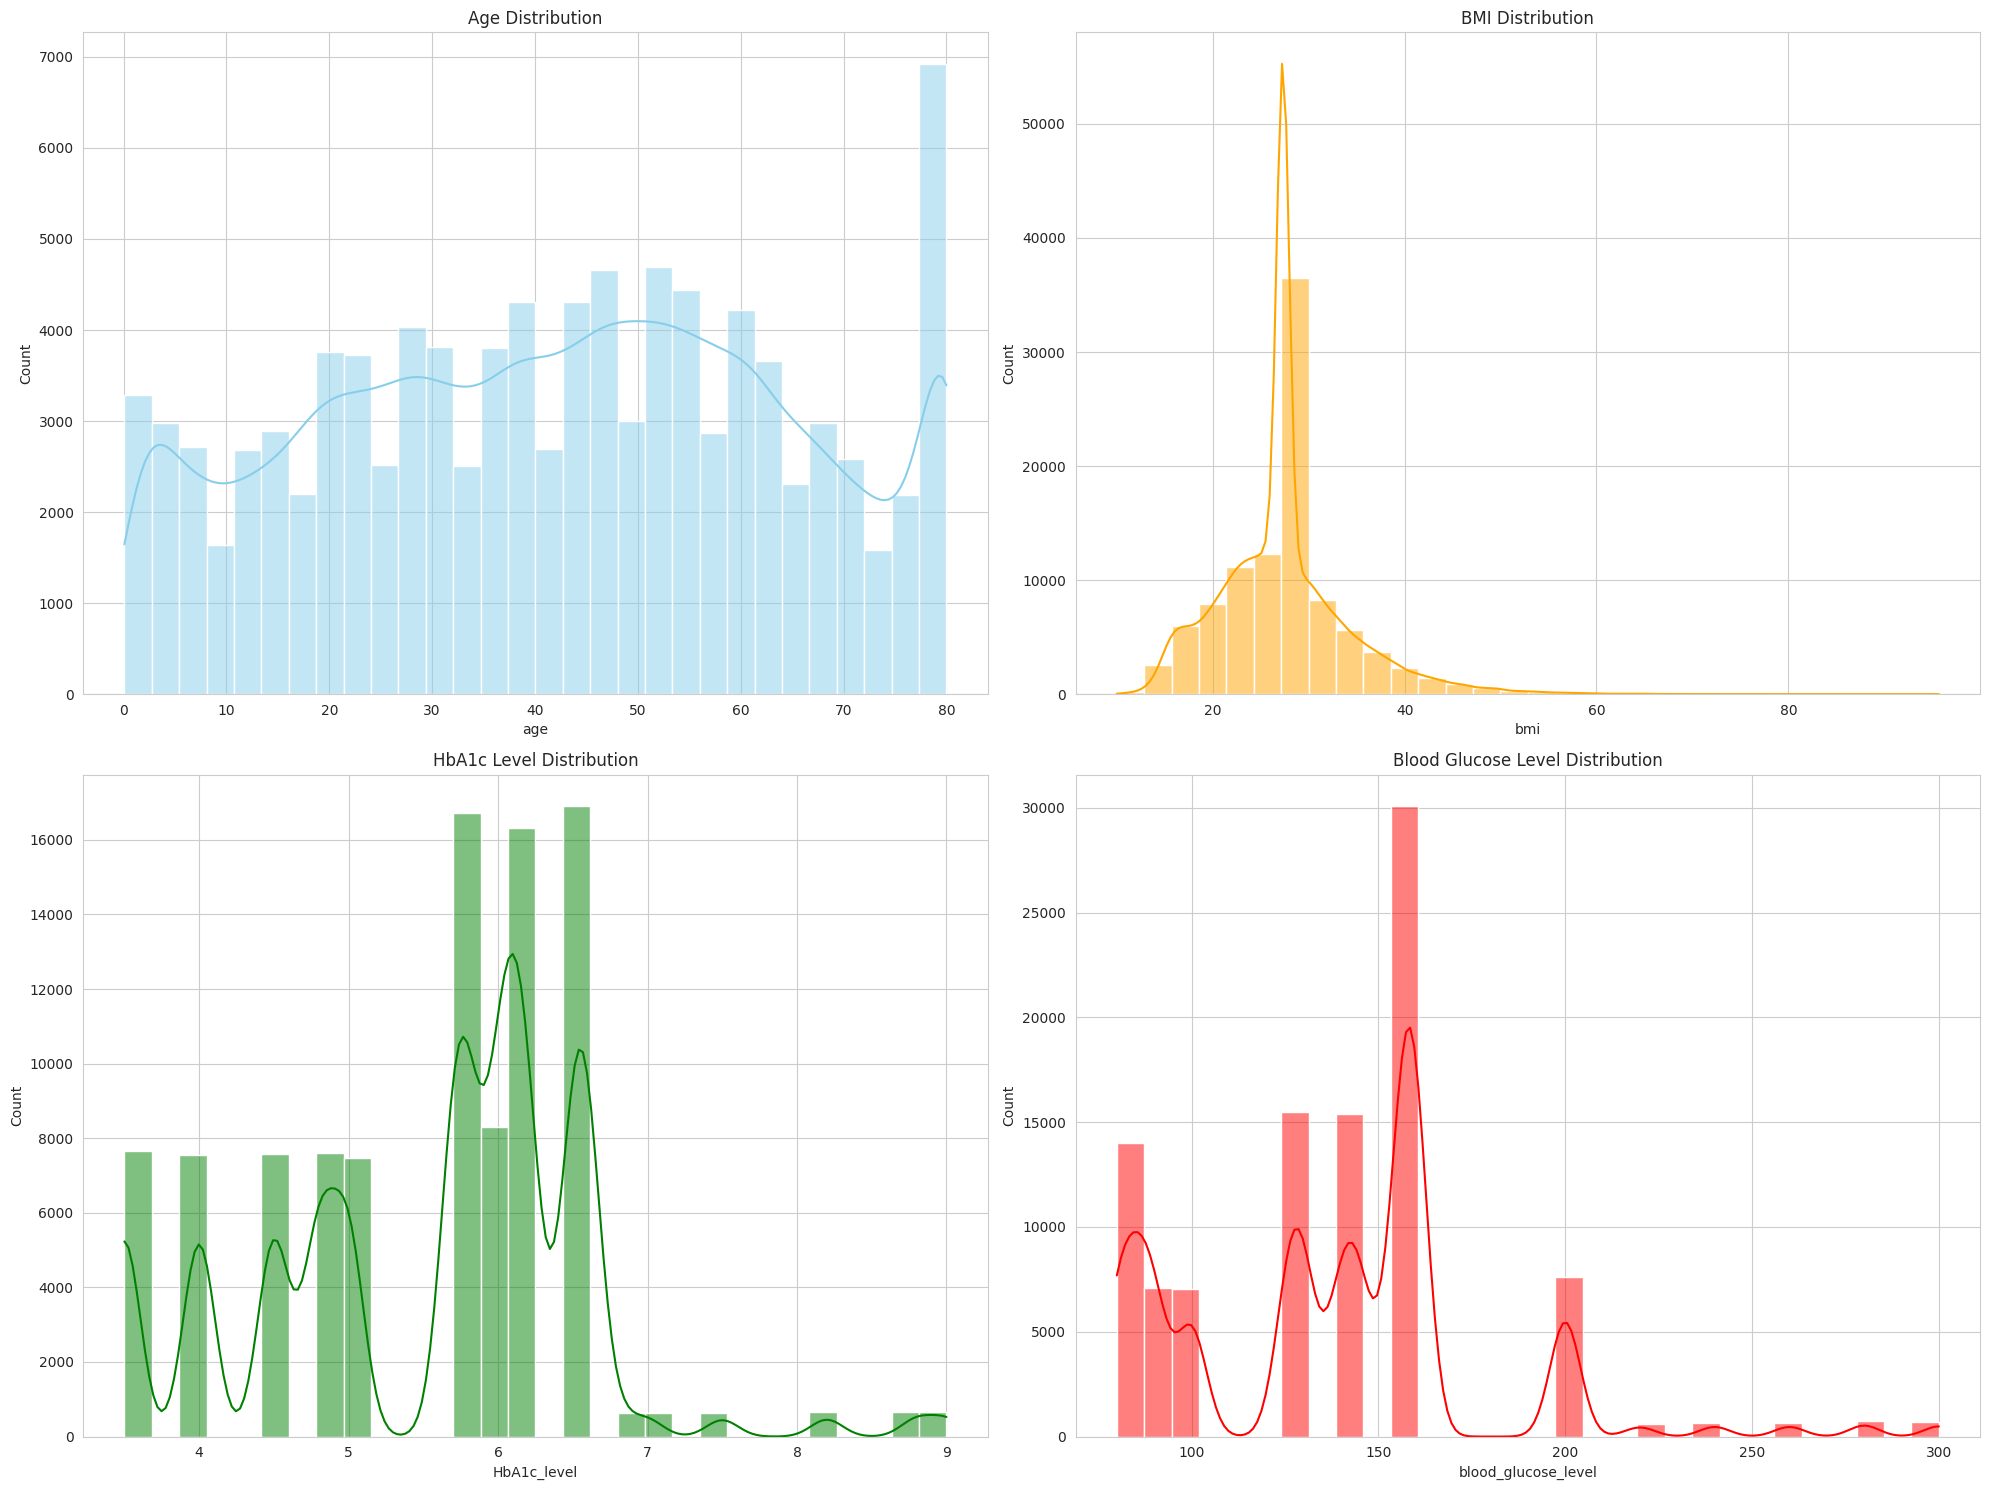

In [11]:
# Set the style of the plots
sns.set_style("whitegrid")

# Distribution plots for numerical variables
plt.figure(figsize=(20, 15))

# Age distribution
plt.subplot(2, 2, 1)
sns.histplot(df['age'], kde=True, bins=30, color='skyblue')
plt.title('Age Distribution')

# BMI distribution
plt.subplot(2, 2, 2)
sns.histplot(df['bmi'], kde=True, bins=30, color='orange')
plt.title('BMI Distribution')

# HbA1c level distribution
plt.subplot(2, 2, 3)
sns.histplot(df['HbA1c_level'], kde=True, bins=30, color='green')
plt.title('HbA1c Level Distribution')

# Blood glucose level distribution
plt.subplot(2, 2, 4)
sns.histplot(df['blood_glucose_level'], kde=True, bins=30, color='red')
plt.title('Blood Glucose Level Distribution')

plt.tight_layout()
plt.show()

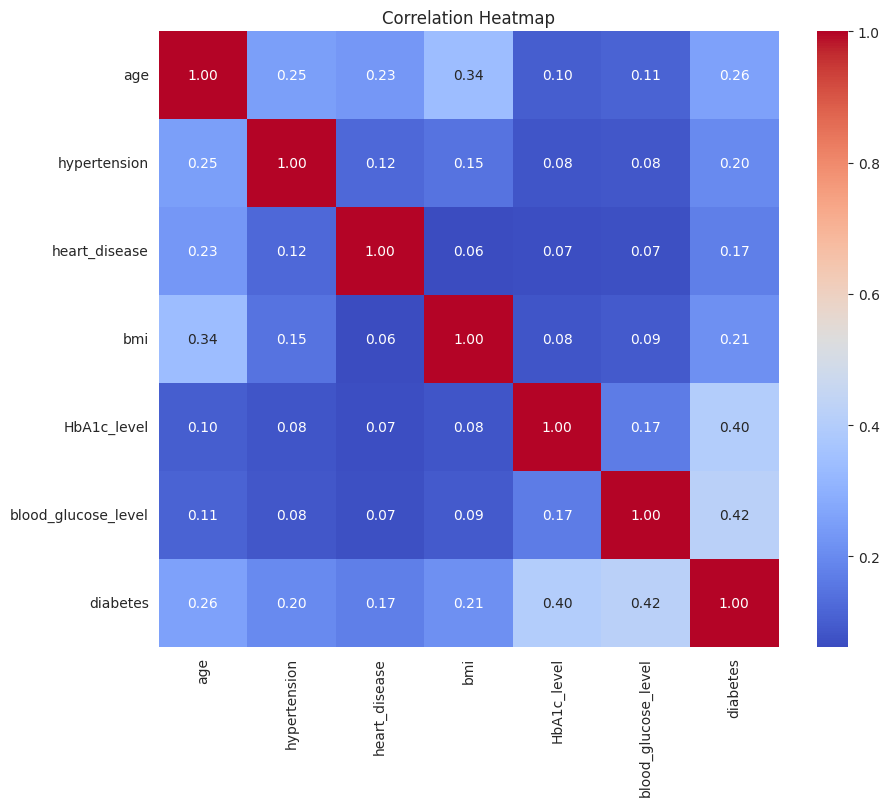

In [12]:
# Compute the correlation matrix for numeric columns only
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr = numeric_df.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

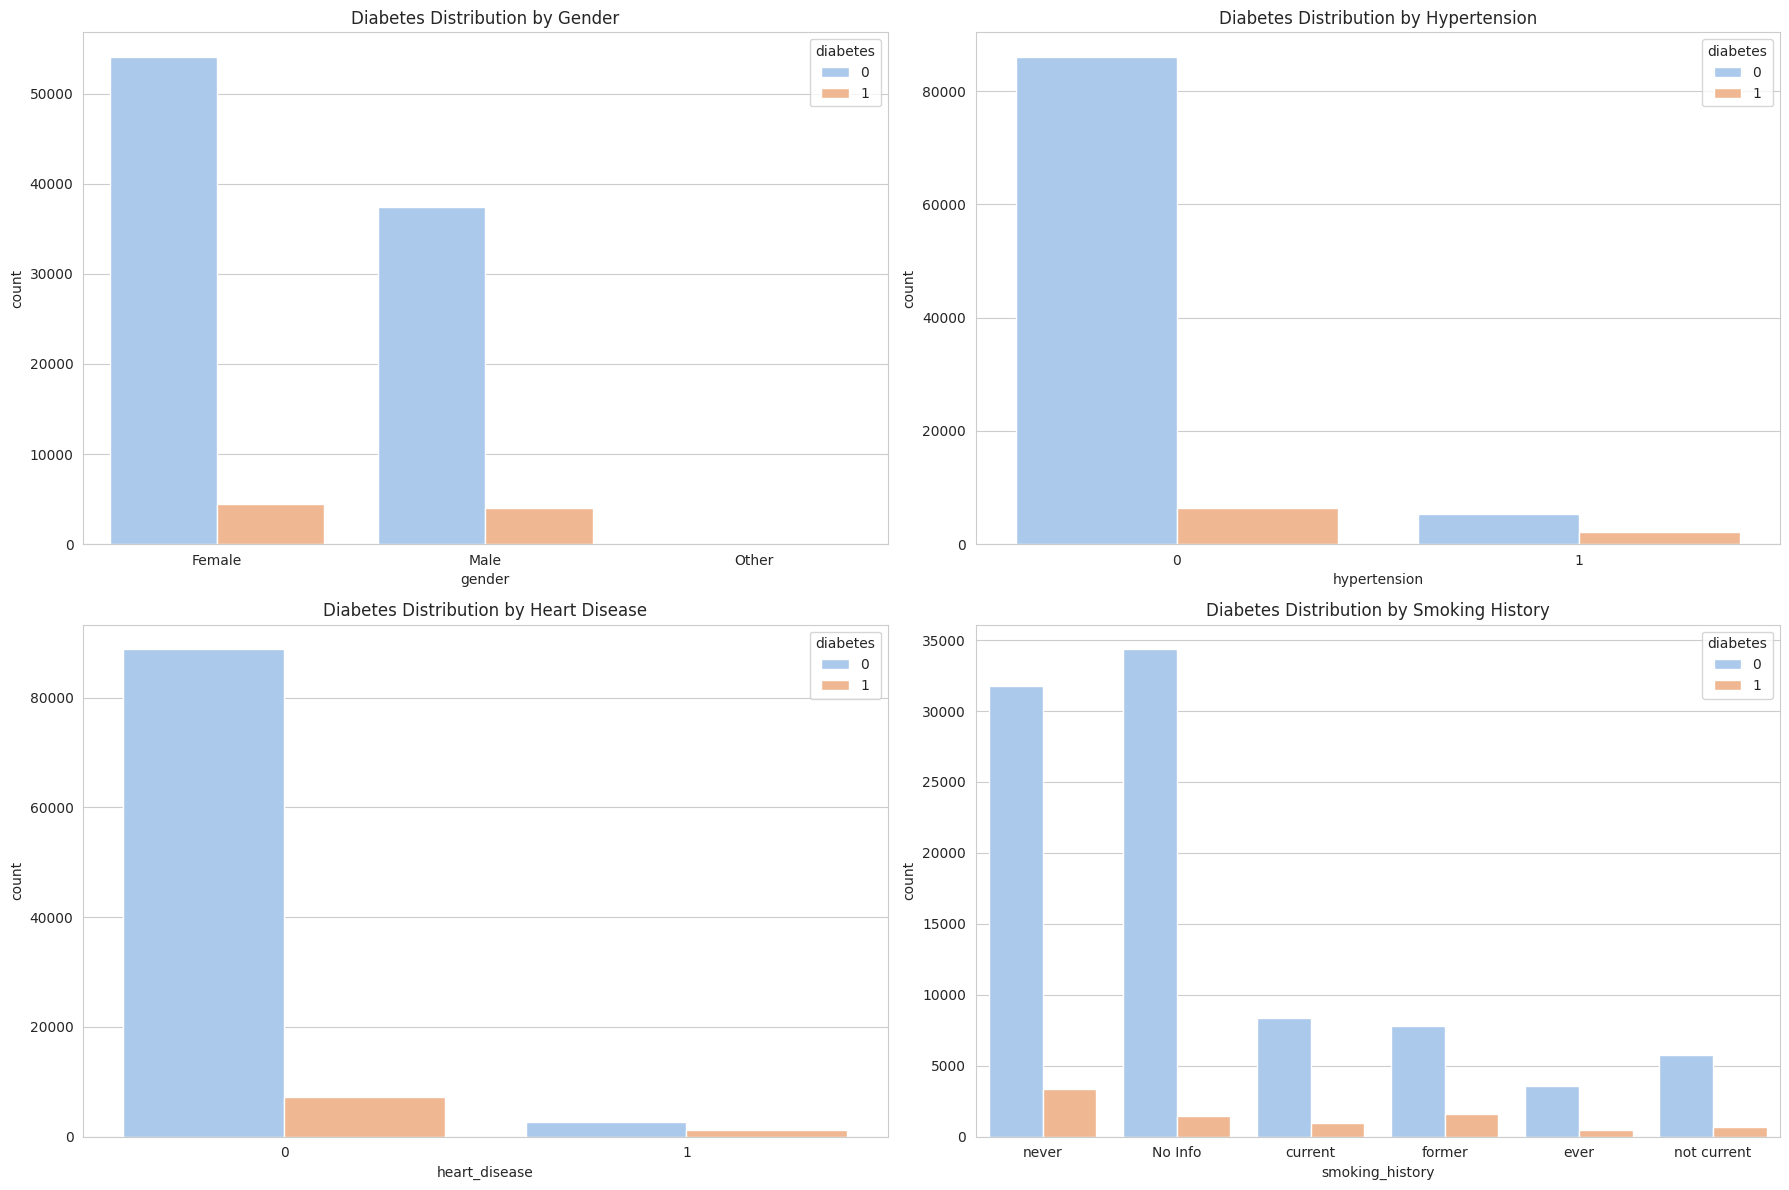

In [13]:
# Bar plots for categorical variables
plt.figure(figsize=(18, 12))

# Diabetes distribution by gender
plt.subplot(2, 2, 1)
sns.countplot(x='gender', hue='diabetes', data=df, palette='pastel')
plt.title('Diabetes Distribution by Gender')

# Diabetes distribution by hypertension
plt.subplot(2, 2, 2)
sns.countplot(x='hypertension', hue='diabetes', data=df, palette='pastel')
plt.title('Diabetes Distribution by Hypertension')

# Diabetes distribution by heart disease
plt.subplot(2, 2, 3)
sns.countplot(x='heart_disease', hue='diabetes', data=df, palette='pastel')
plt.title('Diabetes Distribution by Heart Disease')

# Diabetes distribution by smoking history
plt.subplot(2, 2, 4)
sns.countplot(x='smoking_history', hue='diabetes', data=df, palette='pastel')
plt.title('Diabetes Distribution by Smoking History')

plt.tight_layout()
plt.show()

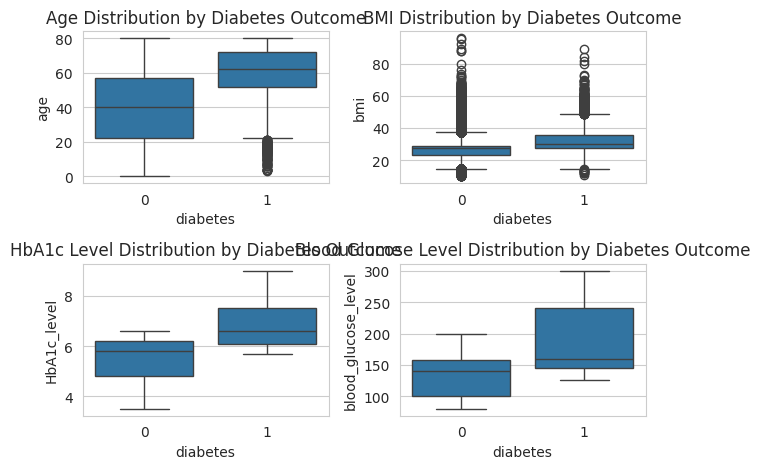

In [14]:
#Box Plots
plt.subplot(2, 2, 1)
sns.boxplot(x='diabetes', y='age', data=df)
plt.title('Age Distribution by Diabetes Outcome')

plt.subplot(2, 2, 2)
sns.boxplot(x='diabetes', y='bmi', data=df)
plt.title('BMI Distribution by Diabetes Outcome')

plt.subplot(2, 2, 3)
sns.boxplot(x='diabetes', y='HbA1c_level', data=df)
plt.title('HbA1c Level Distribution by Diabetes Outcome')

plt.subplot(2, 2, 4)
sns.boxplot(x='diabetes', y='blood_glucose_level', data=df)
plt.title('Blood Glucose Level Distribution by Diabetes Outcome')

plt.tight_layout()
plt.show()

In [15]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [16]:
data = pd.get_dummies(df, columns=['gender', 'smoking_history'], drop_first=True)

In [17]:
data

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,False,False,False,False,False,True,False
1,54.0,0,0,27.32,6.6,80,0,False,False,False,False,False,False,False
2,28.0,0,0,27.32,5.7,158,0,True,False,False,False,False,True,False
3,36.0,0,0,23.45,5.0,155,0,False,False,True,False,False,False,False
4,76.0,1,1,20.14,4.8,155,0,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,80.0,0,0,27.32,6.2,90,0,False,False,False,False,False,False,False
99996,2.0,0,0,17.37,6.5,100,0,False,False,False,False,False,False,False
99997,66.0,0,0,27.83,5.7,155,0,True,False,False,False,True,False,False
99998,24.0,0,0,35.42,4.0,100,0,False,False,False,False,False,True,False


In [18]:
from sklearn.model_selection import train_test_split

# Features (X) and Target (y)
X = data.drop('diabetes', axis=1)
y = data['diabetes']

In [19]:
# Splitting the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [21]:
# Initialize models
logistic_regression = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier(n_estimators = 500)
neural_network = MLPClassifier()
knn = KNeighborsClassifier()
naive_bayes = GaussianNB()

In [22]:
# Train models
logistic_regression.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
neural_network.fit(X_train, y_train)
knn.fit(X_train, y_train)
naive_bayes.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GaussianNB()

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Make predictions
logistic_regression_preds = logistic_regression.predict(X_test)
decision_tree_preds = decision_tree.predict(X_test)
random_forest_preds = random_forest.predict(X_test)
neural_network_preds = neural_network.predict(X_test)
knn_preds = knn.predict(X_test)
naive_bayes_preds = naive_bayes.predict(X_test)

In [24]:
# Evaluate models
logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_preds)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_preds)
random_forest_accuracy = accuracy_score(y_test, random_forest_preds)
neural_network_accuracy = accuracy_score(y_test, neural_network_preds)
knn_accuracy = accuracy_score(y_test, knn_preds)
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_preds)

In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Make predictions
logistic_regression_preds_proba = logistic_regression.predict_proba(X_test)[:, 1]
decision_tree_preds_proba = decision_tree.predict_proba(X_test)[:, 1]
random_forest_preds_proba = random_forest.predict_proba(X_test)[:, 1]
neural_network_preds_proba = neural_network.predict_proba(X_test)[:, 1]
knn_preds_proba = knn.predict_proba(X_test)[:, 1]
naive_bayes_preds_proba = naive_bayes.predict_proba(X_test)[:, 1]

# Calculate precision, recall, F1-score, and ROC-AUC
logistic_regression_precision = precision_score(y_test, logistic_regression_preds)
decision_tree_precision = precision_score(y_test, decision_tree_preds)
random_forest_precision = precision_score(y_test, random_forest_preds)
neural_network_precision = precision_score(y_test, neural_network_preds)
knn_precision = precision_score(y_test, knn_preds)
naive_bayes_precision = precision_score(y_test, naive_bayes_preds)

logistic_regression_recall = recall_score(y_test, logistic_regression_preds)
decision_tree_recall = recall_score(y_test, decision_tree_preds)
random_forest_recall = recall_score(y_test, random_forest_preds)
neural_network_recall = recall_score(y_test, neural_network_preds)
knn_recall = recall_score(y_test, knn_preds)
naive_bayes_recall = recall_score(y_test, naive_bayes_preds)

logistic_regression_f1_score = f1_score(y_test, logistic_regression_preds)
decision_tree_f1_score = f1_score(y_test, decision_tree_preds)
random_forest_f1_score = f1_score(y_test, random_forest_preds)
neural_network_f1_score = f1_score(y_test, neural_network_preds)
knn_f1_score = f1_score(y_test, knn_preds)
naive_bayes_f1_score = f1_score(y_test, naive_bayes_preds)

logistic_regression_roc_auc = roc_auc_score(y_test, logistic_regression_preds_proba)
decision_tree_roc_auc = roc_auc_score(y_test, decision_tree_preds_proba)
random_forest_roc_auc = roc_auc_score(y_test, random_forest_preds_proba)
neural_network_roc_auc = roc_auc_score(y_test, neural_network_preds_proba)
knn_roc_auc = roc_auc_score(y_test, knn_preds_proba)
naive_bayes_roc_auc = roc_auc_score(y_test, naive_bayes_preds_proba)

# Create a dictionary to store evaluation metrics
evaluation_metrics = {
    'Logistic Regression': {
        'Accuracy': logistic_regression_accuracy,
        'Precision': logistic_regression_precision,
        'Recall': logistic_regression_recall,
        'F1-Score': logistic_regression_f1_score,
        'ROC-AUC': logistic_regression_roc_auc
    },
    'Decision Tree': {
        'Accuracy': decision_tree_accuracy,
        'Precision': decision_tree_precision,
        'Recall': decision_tree_recall,
        'F1-Score': decision_tree_f1_score,
        'ROC-AUC': decision_tree_roc_auc
    },
    'Random Forest': {
        'Accuracy': random_forest_accuracy,
        'Precision': random_forest_precision,
        'Recall': random_forest_recall,
        'F1-Score': random_forest_f1_score,
        'ROC-AUC': random_forest_roc_auc
    },
    'Neural Network': {
        'Accuracy': neural_network_accuracy,
        'Precision': neural_network_precision,
        'Recall': neural_network_recall,
        'F1-Score': neural_network_f1_score,
        'ROC-AUC': neural_network_roc_auc
    },
    'KNN': {
        'Accuracy': knn_accuracy,
        'Precision': knn_precision,
        'Recall': knn_recall,
        'F1-Score': knn_f1_score,
        'ROC-AUC': knn_roc_auc
    },
    'Naive Bayes': {
        'Accuracy': naive_bayes_accuracy,
        'Precision': naive_bayes_precision,
        'Recall': naive_bayes_recall,
        'F1-Score': naive_bayes_f1_score,
        'ROC-AUC': naive_bayes_roc_auc
    }
}

# Print evaluation metrics
for model, metrics in evaluation_metrics.items():
    print(model)
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print()


Logistic Regression
Accuracy: 0.95515
Precision: 0.8516912402428447
Recall: 0.5749414519906323
F1-Score: 0.6864732610975184
ROC-AUC: 0.9585588630906077

Decision Tree
Accuracy: 0.95345
Precision: 0.723147616312464
Recall: 0.7371194379391101
F1-Score: 0.7300666859959408
ROC-AUC: 0.8554972426230534

Random Forest
Accuracy: 0.9698
Precision: 0.9444444444444444
Recall: 0.686768149882904
F1-Score: 0.7952542372881356
ROC-AUC: 0.9665920743945089

Neural Network
Accuracy: 0.96375
Precision: 0.8789514263685428
Recall: 0.667447306791569
F1-Score: 0.7587354409317802
ROC-AUC: 0.970156502938795

KNN
Accuracy: 0.95435
Precision: 0.8900883218842002
Recall: 0.5310304449648712
F1-Score: 0.6651998533186652
ROC-AUC: 0.8815039758361752

Naive Bayes
Accuracy: 0.869
Precision: 0.3741721854304636
Recall: 0.7939110070257611
F1-Score: 0.5086271567891973
ROC-AUC: 0.9155229714836753



In [26]:
diabetes_data = pd.get_dummies(df, columns=['gender', 'smoking_history'], drop_first=True)

In [27]:
def dt(m,d,y):
    if (eas503_ex28(y)==True) and (m == 2 and d in range(1,30)):
        return True
    elif (m in [1,3,5,7,8,10,12] and d in range(1,32)) or (m in [4,6,9,11] and d in range(1,31)):
        return True
    elif m == 2 and d in range(1,29):
        return True
    else:
        return False

In [28]:
# Selecting features and target
X = df[['age', 'bmi', 'blood_glucose_level', 'HbA1c_level']]  # Using key predictors
y = df['diabetes']

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create an SVM with the RBF kernel
svm_model = SVC(kernel='rbf', gamma=0.05)

# Train the model
svm_model.fit(X_train, y_train)

# Predict on the test data
predictions = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("SVM Model Accuracy: ", accuracy)


SVM Model Accuracy:  0.96155


In [30]:
# GBM model
gbm_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm_model.fit(X_train, y_train)

# Predictions
gbm_predictions = gbm_model.predict(X_test)
accuracy_gbm = accuracy_score(y_test, predictions)

# Evaluation
print(accuracy_gbm)
print(confusion_matrix(y_test, gbm_predictions))
print(classification_report(y_test, gbm_predictions))

0.96155
[[18284     8]
 [  550  1158]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.99      0.68      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.98      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000



In [31]:
# Splitting the data
X = diabetes_data.drop('diabetes', axis=1)
y = diabetes_data['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining the base learners
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
]

# Defining the meta learner
meta_learner = LogisticRegression()

# Constructing the Stacking model
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=5)

# Fit and prediction
stacking_model.fit(X_train, y_train)
predictions = stacking_model.predict(X_test)

# Evaluation
print("Accuracy of Stacking Model: ", accuracy_score(y_test, predictions))

Accuracy of Stacking Model:  0.97165


In [32]:
# Encode Gender
gender_mapping = {"Male": 0, "Female": 1}
df['gender'] = df['gender'].map(gender_mapping)

# Encode Smoking History
smoking_mapping = {"No Info": 0, "never": 1, "former": 2, "not current": 3, "current": 4}
df['smoking_history'] = df['smoking_history'].map(smoking_mapping)

In [33]:
X = df.drop('diabetes', axis=1)  # Features
y = df['diabetes']  # Target variable

In [34]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1.0,80.0,0,1,1.0,25.19,6.6,140,0
1,1.0,54.0,0,0,0.0,27.32,6.6,80,0
2,0.0,28.0,0,0,1.0,27.32,5.7,158,0
3,1.0,36.0,0,0,4.0,23.45,5.0,155,0
4,0.0,76.0,1,1,4.0,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,1.0,80.0,0,0,0.0,27.32,6.2,90,0
99996,1.0,2.0,0,0,0.0,17.37,6.5,100,0
99997,0.0,66.0,0,0,2.0,27.83,5.7,155,0
99998,1.0,24.0,0,0,1.0,35.42,4.0,100,0


In [35]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
print(X.isnull().sum())

gender                   18
age                       0
hypertension              0
heart_disease             0
smoking_history        4004
bmi                       0
HbA1c_level               0
blood_glucose_level       0
dtype: int64


In [37]:
# CatBoost model
catboost_model = CatBoostClassifier(loss_function="Logloss", verbose=False)
catboost_model.fit(X_train, y_train)

In [38]:
# XGBoost model
xgboost_model = XGBClassifier(objective='binary:logistic', random_state=42)
xgboost_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [39]:
# Make predictions on test set
catboost_predictions = catboost_model.predict(X_test)
xgboost_predictions = xgboost_model.predict(X_test)

In [40]:
print("CatBoost Model Accuracy:", accuracy_score(y_test, catboost_predictions))
print("XGBoost Model Accuracy:", accuracy_score(y_test, xgboost_predictions))

CatBoost Model Accuracy: 0.9712
XGBoost Model Accuracy: 0.9712


In [41]:
print("\nCatBoost Classification Report:")
print(classification_report(y_test, catboost_predictions))

print("\nXGBoost Classification Report:")
print(classification_report(y_test, xgboost_predictions))


CatBoost Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.95      0.70      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.85      0.89     20000
weighted avg       0.97      0.97      0.97     20000


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.95      0.70      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.85      0.89     20000
weighted avg       0.97      0.97      0.97     20000

